# Inferenza bayesiana {#sec-solutions-bayesian-inference}

In [1]:
# Standard library imports
import os

# Third-party imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
import scipy.stats as stats
from scipy.special import expit  # Funzione logistica
from cmdstanpy import cmdstan_path, CmdStanModel

# Configuration
seed = sum(map(ord, "stan_poisson_regression"))
rng = np.random.default_rng(seed=seed)
az.style.use("arviz-darkgrid")
%config InlineBackend.figure_format = "retina"

# Define directories
home_directory = os.path.expanduser("~")
project_directory = f"{home_directory}/_repositories/psicometria"

# @sec-subj-prop {.unnumbered} 

@exr-subj-prop-1

```python
import numpy as np
from scipy.stats import binom

# Definire i parametri del problema
n = 100  # numero di studi
k = 20   # numero di studi che hanno condiviso i materiali

# Discretizzazione della probabilità theta
theta_grid = np.array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95])

# Distribuzione a priori
prior_probs = np.array([0.05, 0.20, 0.30, 0.15, 0.10, 0.08, 0.05, 0.03, 0.02, 0.02])

# Calcolo della verosimiglianza per ciascuna theta
likelihood = binom.pmf(k, n, theta_grid)

# Distribuzione a posteriori (non normalizzata)
posterior_unnorm = likelihood * prior_probs

# Normalizzazione della distribuzione a posteriori
posterior_probs = posterior_unnorm / np.sum(posterior_unnorm)

# Calcolo della media a posteriori
posterior_mean = np.sum(posterior_probs * theta_grid)

# Estrazione di un campione casuale dalla distribuzione a posteriori
np.random.seed(42)  # per la riproducibilità
posterior_sample = np.random.choice(theta_grid, size=10000, p=posterior_probs)

# Calcolo dell'intervallo di credibilità al 89%
cred_interval = np.percentile(posterior_sample, [5.5, 94.5])

posterior_mean, cred_interval
```

La soluzione dell'esercizio basato sul metodo della griglia fornisce i seguenti risultati:

- **Media della distribuzione a posteriori**: 0.2152
- **Intervallo di credibilità al 89%**: [0.15, 0.25]

Questi risultati indicano che, dopo aver osservato i dati e aver considerato la distribuzione a priori, la probabilità stimata che uno studio condivida i materiali di ricerca è circa il 21.5%, con un intervallo di credibilità all'89% che va dal 15% al 25%.

# @sec-congiugate-families-1 {.unnumbered} 

@exr-conjugate-families-1

```python
import scipy.stats as stats
import numpy as np

# Dati forniti
alpha_prior = 31.91
beta_prior = 100 - 31.91  # 100 - successo = insuccesso

# Parametri per la distribuzione a priori
a_prior = alpha_prior
b_prior = beta_prior

# Parametri per il calcolo della distribuzione a posteriori
n_observations = 152

# Scenario (a): tasso di successo del 60%
successes_a = 0.60 * n_observations

# Scenario (b): tasso di successo del 96%
successes_b = 0.96 * n_observations

# Calcolo della distribuzione a posteriori
a_posterior_a = a_prior + successes_a
b_posterior_a = b_prior + (n_observations - successes_a)

a_posterior_b = a_prior + successes_b
b_posterior_b = b_prior + (n_observations - successes_b)

# Distribuzioni beta a posteriori
x = np.linspace(0, 1, 1000)
posterior_a = stats.beta.pdf(x, a_posterior_a, b_posterior_a)
posterior_b = stats.beta.pdf(x, a_posterior_b, b_posterior_b)

a_posterior_a, b_posterior_a, a_posterior_b, b_posterior_b
```

La risoluzione del problema ha portato al calcolo delle distribuzioni a posteriori nei due scenari specificati, utilizzando il metodo delle famiglie coniugate.

**Scenario (a): Tasso di successo del 60%**

- **Parametri della distribuzione a posteriori:**
  - $\alpha_{\text{post}} = 123.11$
  - $\beta_{\text{post}} = 128.89$

**Scenario (b): Tasso di successo del 96%**

- **Parametri della distribuzione a posteriori:**
  - $\alpha_{\text{post}} = 177.83$
  - $\beta_{\text{post}} = 74.17$

In entrambi gli scenari, i parametri $\alpha_{\text{post}}$ e $\beta_{\text{post}}$ determinano le forme delle distribuzioni a posteriori, che ci forniscono informazioni aggiornate su $\theta$ (il tasso di successo) dopo aver osservato i dati.

**Commento sui Risultati**

- **Scenario (a)**: Con un tasso di successo osservato del 60%, la distribuzione a posteriori riflette una moderata concentrazione attorno a $\theta = 0.49$, suggerendo una certa incertezza nella stima del vero tasso di successo, ma comunque compatibile con la distribuzione a priori basata sugli studi preregistrati.
  
- **Scenario (b)**: Con un tasso di successo osservato del 96%, la distribuzione a posteriori è fortemente concentrata verso l'alto, con un valore medio di $\theta$ che si avvicina a 0.71. Questo scenario riflette una maggiore confidenza in un tasso di successo elevato, pur risultando in una distribuzione molto diversa rispetto alla distribuzione a priori.

Questi risultati mostrano come i dati osservati influenzino la nostra stima del tasso di successo, con la distribuzione a priori che viene "aggiornata" in base alle osservazioni fatte. In particolare, lo scenario con il 96% di successo evidenzia una netta discrepanza rispetto alla distribuzione a priori, suggerendo che i risultati ottenuti potrebbero essere molto più ottimistici rispetto alla base di riferimento data dagli studi preregistrati.

@exr-conjugate-families-2

Sia $\theta$ la probabilità di nascita di una femmina dato il caso di placenta previa. Se utilizziamo una distribuzione a priori uniforme per $\theta$ (Beta(1, 1)), allora il problema si riduce a trovare la distribuzione a posteriori per $\theta$ nel contesto di un modello beta-binomiale. La distribuzione a posteriori risulta essere una Beta(y + $\alpha_{\text{prior}}$, N - y + $\beta_{\text{prior}}$), ovvero una Beta(438, 544). Possiamo calcolare la media a posteriori di $\theta$ nel modo seguente:

In [4]:
births = 987
fem_births = 437
stats.beta.mean(fem_births + 1, births - fem_births + 1).round(3)

0.443

Possiamo anche simulare un campione dalla distribuzione a posteriori per fare inferenze.

Text(0.5, 0.95, 'Proporzione di nascite femminili\nnella popolazione generale')

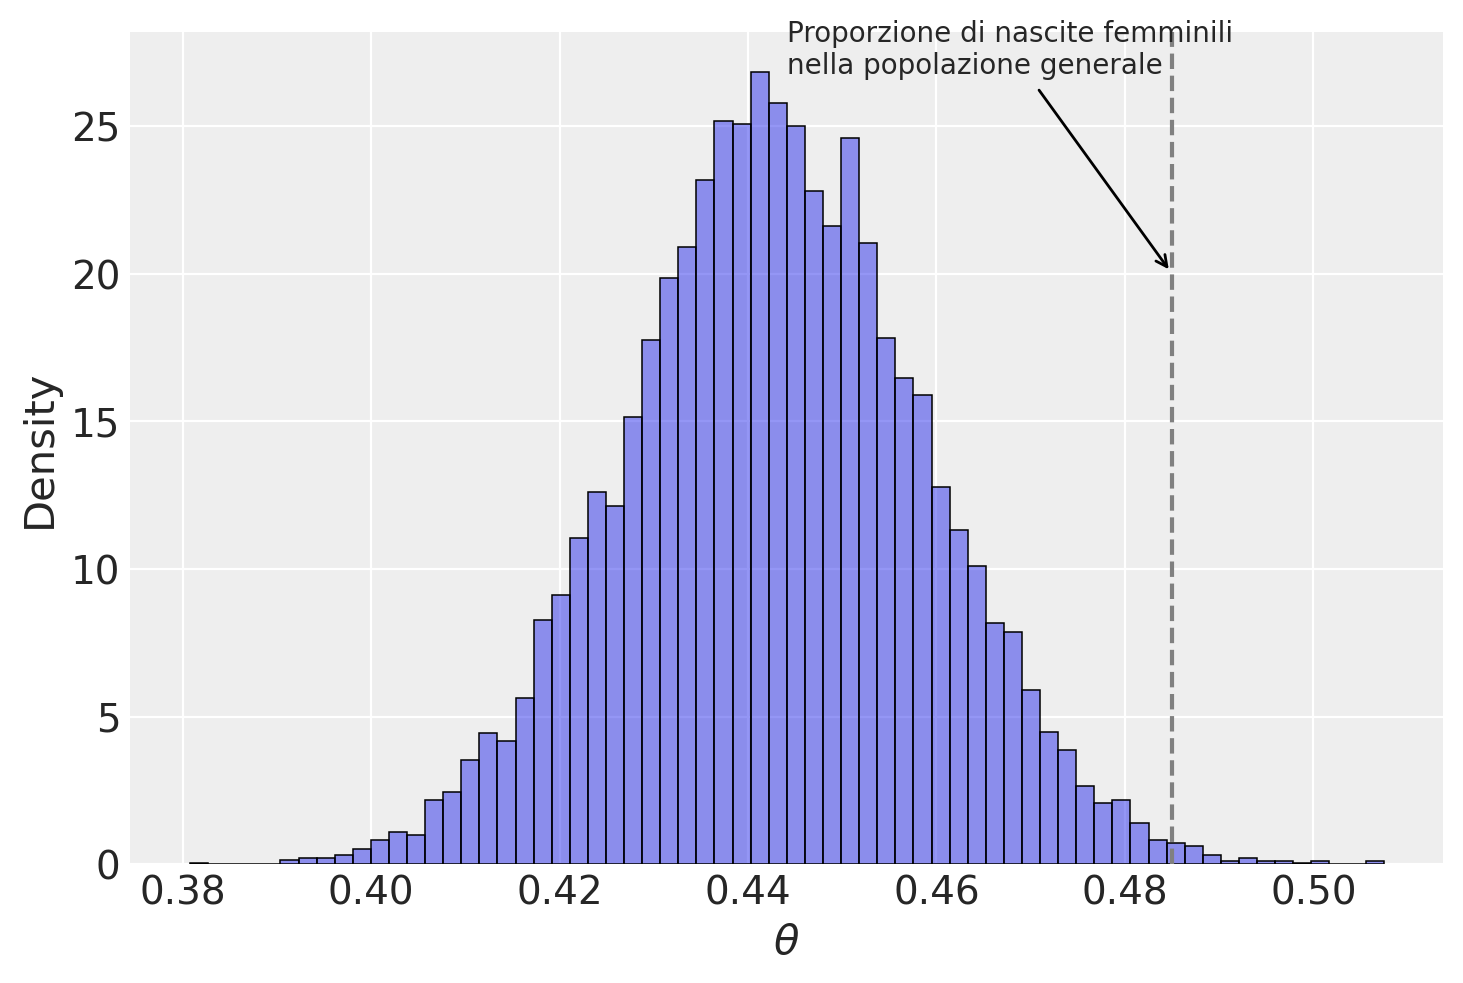

In [31]:
posterior_sample = stats.beta.rvs(size=10000, a=fem_births + 1, b=births - fem_births + 1)

sns.histplot(posterior_sample, alpha=0.5, stat="density")
_ = plt.xlabel(r"$\theta$")
plt.axvline(0.485, color="gray", linestyle="--")

plt.annotate(
    "Proporzione di nascite femminili\nnella popolazione generale",
    xy=(0.485, 20),  # Posizione dell'annotazione (x, y)
    xytext=(0.5, 0.95),  # Posizione del testo dell'annotazione
    textcoords="axes fraction",
    arrowprops=dict(facecolor="black", arrowstyle="->"),
    horizontalalignment="left",
)

In [29]:
np.quantile(posterior_sample, [0.025, 0.975]).round(3)

array([0.411, 0.473])

Riassunti precisi della distribuzione a posteriori possono essere ottenuti dalle proprietà della distribuzione beta. I quantili esatti della distribuzione a posteriori possono essere calcolati tramite integrazione numerica della densità beta; la mediana risulta essere 0.446 e l'intervallo centrale di credibilità al 95% è [0.415, 0.477].

In conclusione, possiamo affermare con un livello di certezza soggettiva del 95% che la proporzione di nascite femminili nella popolazione con placenta previa è inferiore alla proporzione di nascite femminili nella popolazione generale.

@exr-conjugate-families-3

/var/folders/s7/z86r4t9j6yx376cm120nln6w0000gn/T/ipykernel_10074/1642415141.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


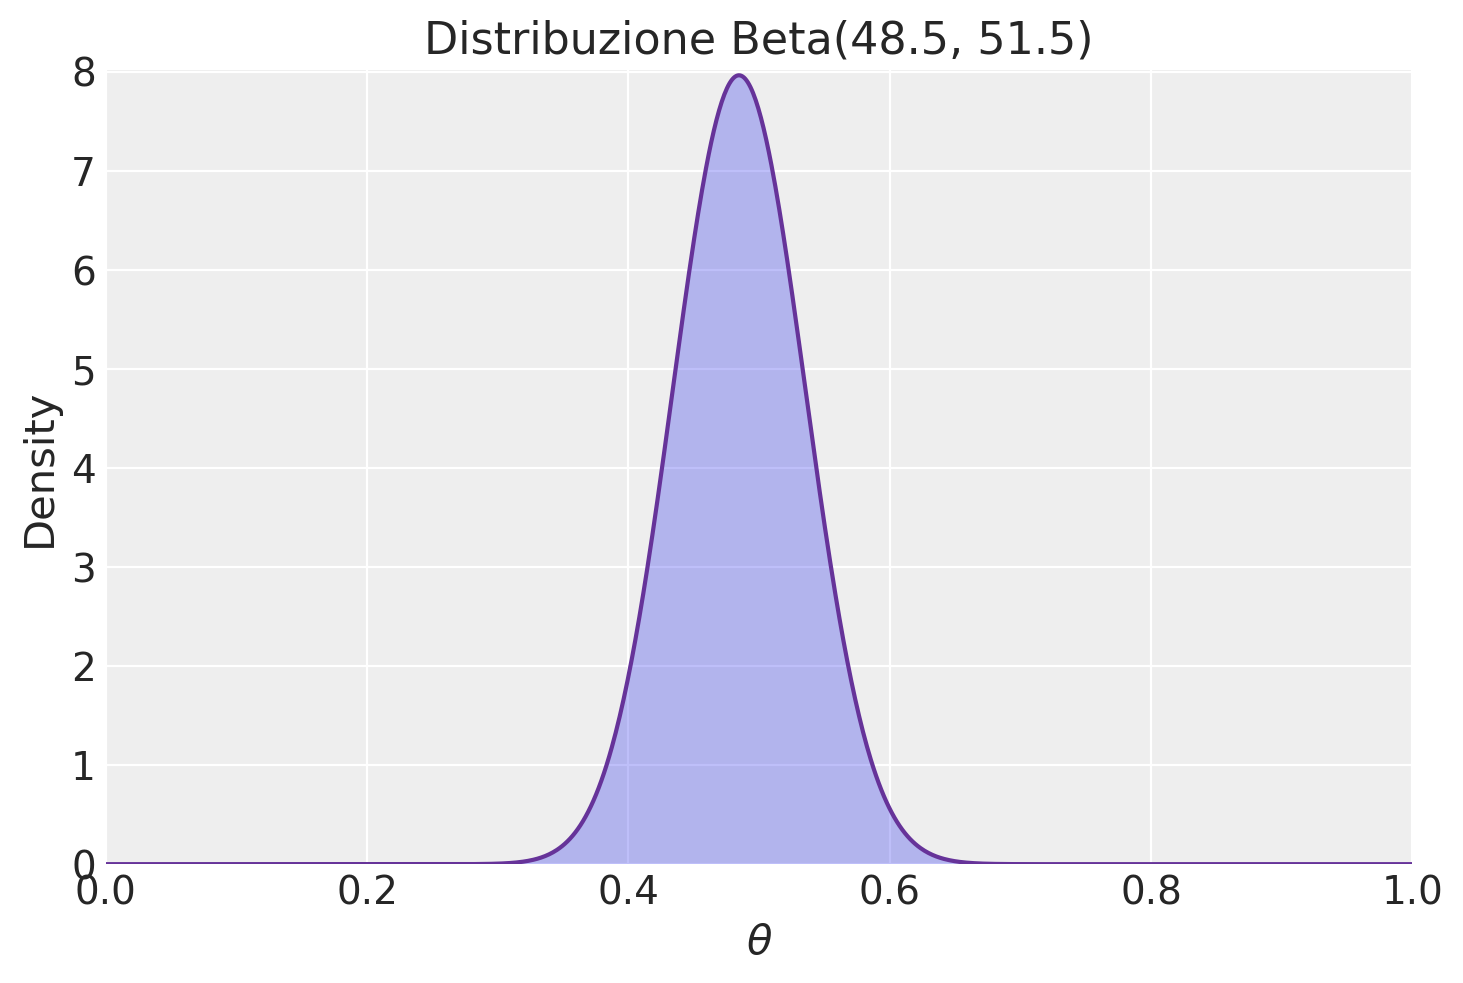

In [55]:
# Parametri della distribuzione Beta
alpha_prior = 48.5
beta_prior = 51.5

# Creazione dei valori x su cui valutare la distribuzione Beta
x = np.linspace(0, 1, 1000)

# Valutazione della densità di probabilità Beta su x
y = stats.beta.pdf(x, alpha_prior, beta_prior)

# Creazione del grafico
plt.plot(x, y, color="rebeccapurple")
plt.fill_between(x, y, alpha=0.3)
plt.xlim(0, 1)
plt.ylim(0, max(y) + 0.05)
plt.xlabel(r"$\theta$")
plt.ylabel("Density")
plt.title("Distribuzione Beta(48.5, 51.5)")
plt.legend()
plt.show()

Text(0.5, 0.95, 'Proporzione di nascite femminili\nnella popolazione generale')

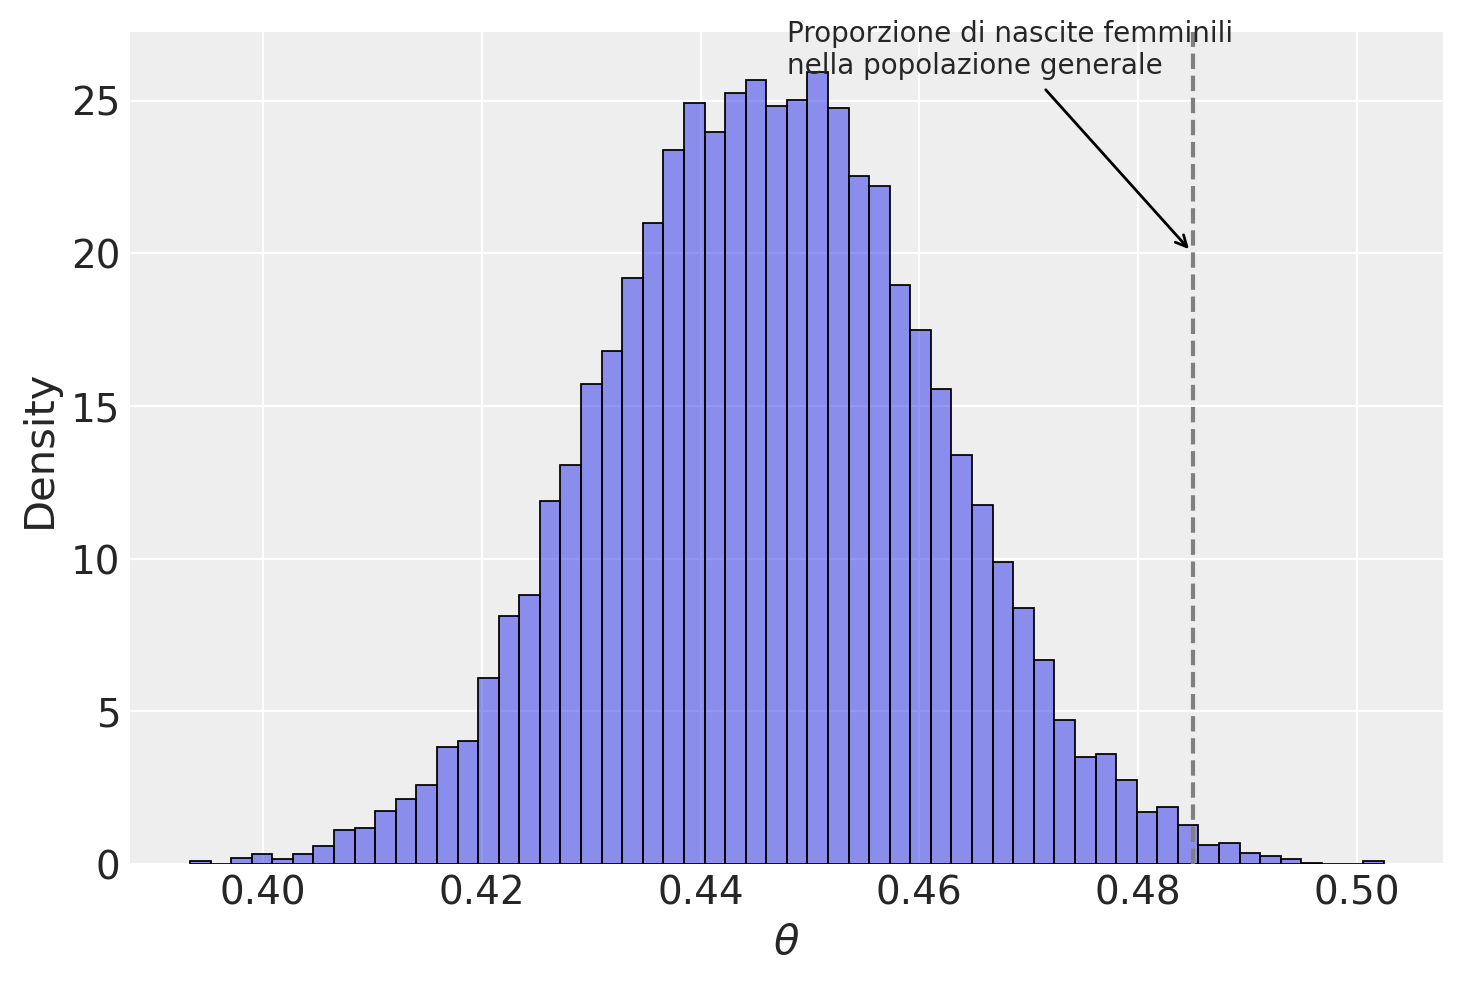

In [53]:
births = 987
fem_births = 437

posterior_sample = stats.beta.rvs(
    size=10000, a=fem_births + alpha_prior, b=births - fem_births + beta_prior
)

sns.histplot(posterior_sample, alpha=0.5, stat="density")
_ = plt.xlabel(r"$\theta$")
plt.axvline(0.485, color="gray", linestyle="--")

plt.annotate(
    "Proporzione di nascite femminili\nnella popolazione generale",
    xy=(0.485, 20),  # Posizione dell'annotazione (x, y)
    xytext=(0.5, 0.95),  # Posizione del testo dell'annotazione
    textcoords="axes fraction",
    arrowprops=dict(facecolor="black", arrowstyle="->"),
    horizontalalignment="left",
)

In [54]:
np.quantile(posterior_sample, [0.025, 0.975]).round(3)

array([0.417, 0.476])

I risultati replicano sostanzialmente quelli ottenuti nell'@exr-conjugate-families-2.

@exr-conjugate-families-4

Per risolvere il problema utilizzando il modello beta-binomiale e calcolare la distribuzione a posteriori, seguiamo i seguenti passaggi. 

- Abbiamo un campione di 202 soggetti adulti italiani, e 6.4% di questi sono mancini. Ciò significa che il numero di mancini osservati è $y = 0.064 \times 202 = 12.928$, che approssimiamo a $y = 13$.
- La prior informativa basata sullo studio di @papadatou2020human è espressa come una distribuzione Beta(8, 60).

Nel modello beta-binomiale, se abbiamo una prior $\text{Beta}(\alpha_{\text{prior}}, \beta_{\text{prior}})$, e osserviamo $y$ successi su $N$ tentativi, la distribuzione a posteriori sarà:

$$
\text{Beta}(\alpha_{\text{post}} = \alpha_{\text{prior}} + y, \, \beta_{\text{post}} = \beta_{\text{prior}} + N - y)
$$

In questo caso:

- $\alpha_{\text{prior}} = 8$
- $\beta_{\text{prior}} = 60$
- $y = 13$
- $N = 202$

Quindi i parametri della distribuzione a posteriori saranno:

$$
\alpha_{\text{post}} = 8 + 13 = 21
$$

$$
\beta_{\text{post}} = 60 + 202 - 13 = 249
$$

La distribuzione a posteriori è dunque una Beta(21, 249).

Questa distribuzione a posteriori riflette la nostra credenza aggiornata sulla proporzione di mancini nella popolazione italiana, tenendo conto sia delle evidenze dello studio di @gori2024italian che delle informazioni pregresse della meta-analisi di @papadatou2020human.

Per visualizzare questa distribuzione a posteriori, possiamo utilizzare Python:

/var/folders/s7/z86r4t9j6yx376cm120nln6w0000gn/T/ipykernel_10074/519876995.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


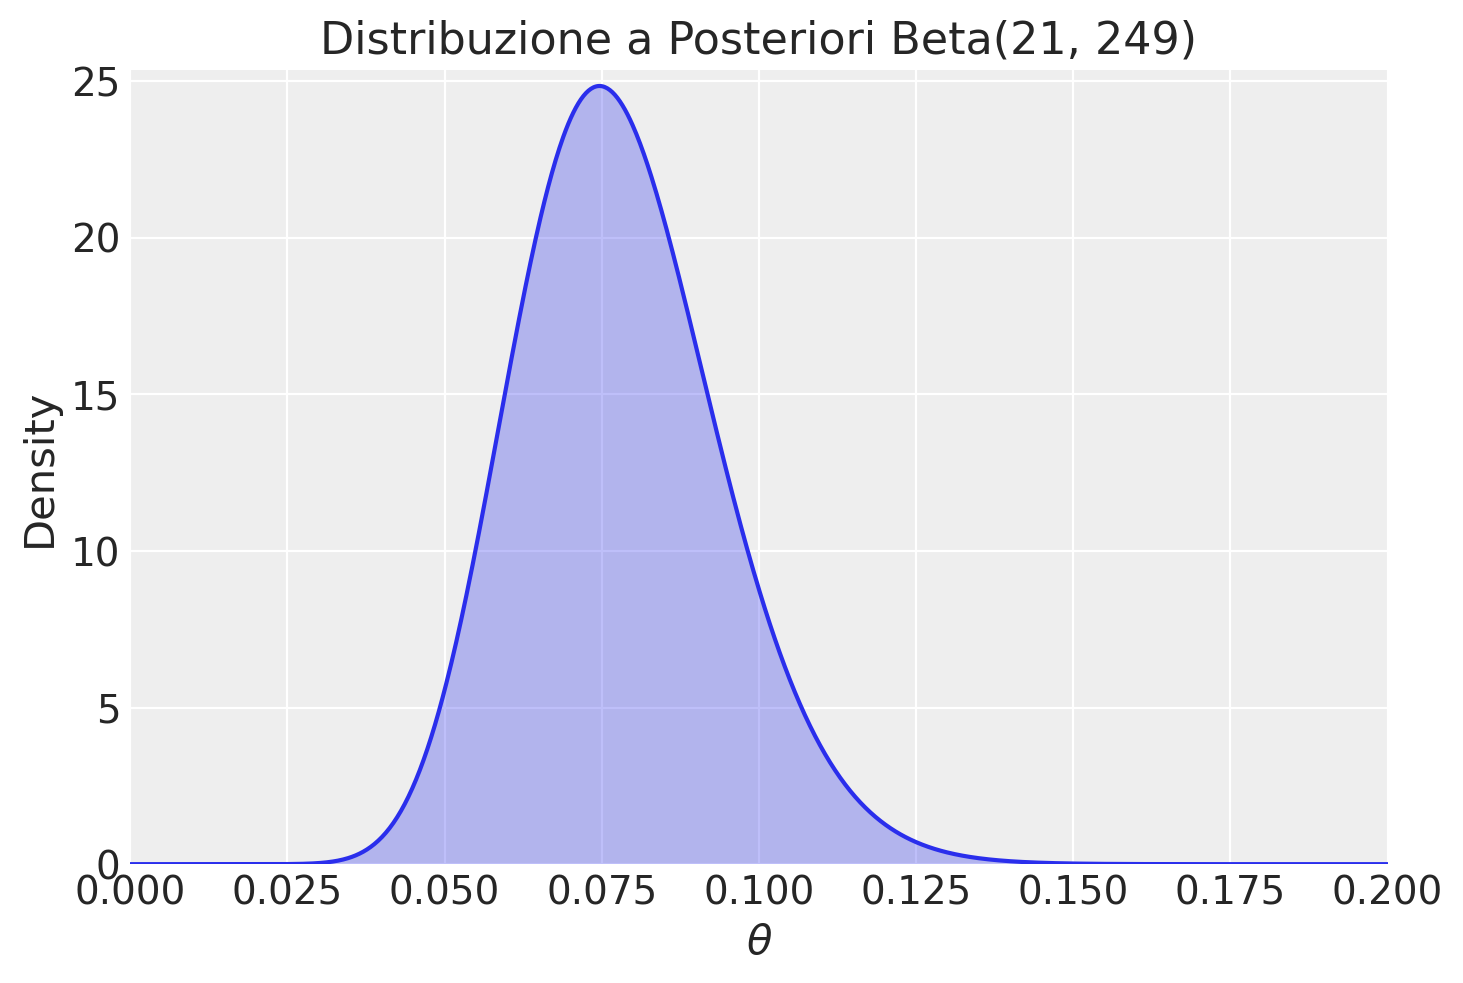

In [63]:
# Parametri della distribuzione Beta a posteriori
alpha_post = 21
beta_post = 249

# Creazione dei valori x su cui valutare la distribuzione Beta
x = np.linspace(
    0, 0.2, 1000
)  # Si concentra la visualizzazione nell'intervallo plausibile

# Valutazione della densità di probabilità Beta su x
y = stats.beta.pdf(x, alpha_post, beta_post)

# Creazione del grafico
plt.plot(x, y)
plt.fill_between(x, y, alpha=0.3)
plt.xlim(0, 0.2)
plt.ylim(0, max(y) + 0.5)
plt.xlabel(r"$\theta$")
plt.ylabel("Density")
plt.title("Distribuzione a Posteriori Beta(21, 249)")
plt.legend()
plt.show()

Possiamo anche calcolare la media e la varianza della distribuzione a posteriori:

- Media a posteriori:

$$
\mu_{\text{post}} = \frac{\alpha_{\text{post}}}{\alpha_{\text{post}} + \beta_{\text{post}}} = \frac{21}{21 + 249} = 0.077
$$

- Varianza a posteriori:

$$
\text{Var}_{\text{post}} = \frac{\alpha_{\text{post}} \beta_{\text{post}}}{(\alpha_{\text{post}} + \beta_{\text{post}})^2 (\alpha_{\text{post}} + \beta_{\text{post}} + 1)} \approx 0.00026
$$

La distribuzione a posteriori Beta(21, 249) suggerisce che la proporzione di mancini nella popolazione italiana è molto probabilmente vicina al 7.7%, con un intervallo di incertezza che riflette sia i dati attuali che le informazioni pregresse.

# @sec-gamma-poisson-model {.unnumbered} 

@exr-gamma-poisson-1

Nel caso del modello Gamma-Poisson, la distribuzione Gamma è la coniugata naturale della distribuzione di Poisson. Questo significa che se usiamo una priori Gamma per il tasso λ e una verosimiglianza Poisson, la distribuzione a posteriori sarà ancora una Gamma.

Ecco la soluzione analitica per l'esercizio:

1) Priori:
   λ ~ Gamma(α, β)
   dove α è il parametro di forma e β è il parametro di tasso (inverso del parametro di scala)

2) Verosimiglianza:
   y_i | λ ~ Poisson(λ)
   per i = 1, ..., n osservazioni

3) Posteriori:
   λ | y ~ Gamma(α_post, β_post)

   dove:
   α_post = α + Σy_i
   β_post = β + n

   Σy_i è la somma di tutte le osservazioni
   n è il numero di osservazioni

Nel nostro caso specifico:

- Priori: abbiamo usato α = 1.0 e β = 1 / 1.52 ≈ 0.658
- Dati: y = [2, 0, 1, 3], quindi Σy_i = 6 e n = 4

Calcoliamo i parametri della posteriori:

α_post = 1.0 + 6 = 7.0
β_post = 0.658 + 4 = 4.658

Quindi, la distribuzione a posteriori è:

λ | y ~ Gamma(7.0, 4.658)

Da questa distribuzione a posteriori, possiamo calcolare direttamente:

1) Media a posteriori: E[λ | y] = α_post / β_post ≈ 1.503

2) Moda a posteriori: (α_post - 1) / β_post ≈ 1.288 (solo per α_post > 1)

3) Varianza a posteriori: Var[λ | y] = α_post / (β_post)^2 ≈ 0.323

4) Intervallo di credibilità al 95%: 
   Possiamo usare la funzione di punto percentuale inversa della distribuzione Gamma.
   In Python, potremmo calcolarla così:

   ```python
   from scipy import stats
   
   lower_ci = stats.gamma.ppf(0.025, a=7.0, scale=1/4.658)
   upper_ci = stats.gamma.ppf(0.975, a=7.0, scale=1/4.658)
   ```


# @sec_stan {.unnumbered}

@exr-stan-beta-binomial-1

Laplace adottò la seguente distribuzione campionaria per modellare il numero di maschi nati su un totale di $N$ nascite:

$$
y \sim \text{binomiale}(N, \theta),
$$

dove $N$ è il numero totale di nascite, $\theta$ è la probabilità di nascita di un maschio e $y$ è il numero di nascite maschili.

Laplace utilizzò la seguente distribuzione a priori per $\theta$:

$$
\theta \sim \text{beta}(1, 1),
$$

dove la distribuzione $\text{beta}(1, 1)$ è uniforme sull'intervallo $\theta \in (0, 1)$.

Ecco come possiamo specificare il modello Stan:

In [2]:
stan_file = os.path.join(project_directory, "stan", "sex-ratio.stan")

with open(stan_file, "r") as f:
    print(f.read())

data {
  int<lower = 0> N;
  int<lower = 0, upper = N> y;
  int<lower = 0> alpha_prior;
  int<lower = 0> beta_prior;
}
parameters {
  real<lower=0, upper=1> theta;
}
model {
  theta ~ beta(alpha_prior, beta_prior);
  y ~ binomial(N, theta);
}
generated quantities {
  int<lower=0, upper=1> boys_gt_girls = theta > 0.5;
}



In questo programma Stan, vediamo che sia il numero totale di nascite ($N$) sia il numero di nascite maschili ($y$) sono forniti come dati. Poi ci sono due blocchi aggiuntivi: un _blocco dei parametri_, usato per dichiarare valori sconosciuti (qui, solo il tasso di nascite maschili $\theta$), e un _blocco del modello_, dove specifichiamo la distribuzione a priori e la verosimiglianza. La distribuzione a posteriori viene calcolata da Stan combinando queste due componenti. Inoltre, c'è un *blocco delle quantità generate* dove viene calcolata una variabile booleana che indica se la probabilità di nascita dei maschi $\theta$ è maggiore di 0.5.

Il modello di Laplace ci consente di calcolare non solo la probabilità di nascita di un maschio, ma anche la probabilità che nascano più maschi che femmine.

In [3]:
model = CmdStanModel(stan_file=stan_file)

In [4]:
boys = 110312
girls = 105287

data = {"N": boys + girls, "y": boys, "alpha_prior": 1, "beta_prior": 1}

In [5]:
sample = model.sample(
    data=data,
    iter_warmup=1000,
    iter_sampling=10_000,
    seed=123,
    show_progress=False,
    show_console=False,
)

11:19:03 - cmdstanpy - INFO - CmdStan start processing
11:19:03 - cmdstanpy - INFO - Chain [1] start processing
11:19:03 - cmdstanpy - INFO - Chain [2] start processing
11:19:03 - cmdstanpy - INFO - Chain [3] start processing
11:19:03 - cmdstanpy - INFO - Chain [4] start processing
11:19:03 - cmdstanpy - INFO - Chain [1] done processing
11:19:03 - cmdstanpy - INFO - Chain [2] done processing
11:19:03 - cmdstanpy - INFO - Chain [3] done processing
11:19:03 - cmdstanpy - INFO - Chain [4] done processing


Procediamo quindi a estrarre i campioni a posteriori per le variabili `theta` e `boys_gt_girls`.

In [6]:
theta_draws = sample.stan_variable("theta")
boys_gt_girls_draws = sample.stan_variable("boys_gt_girls")

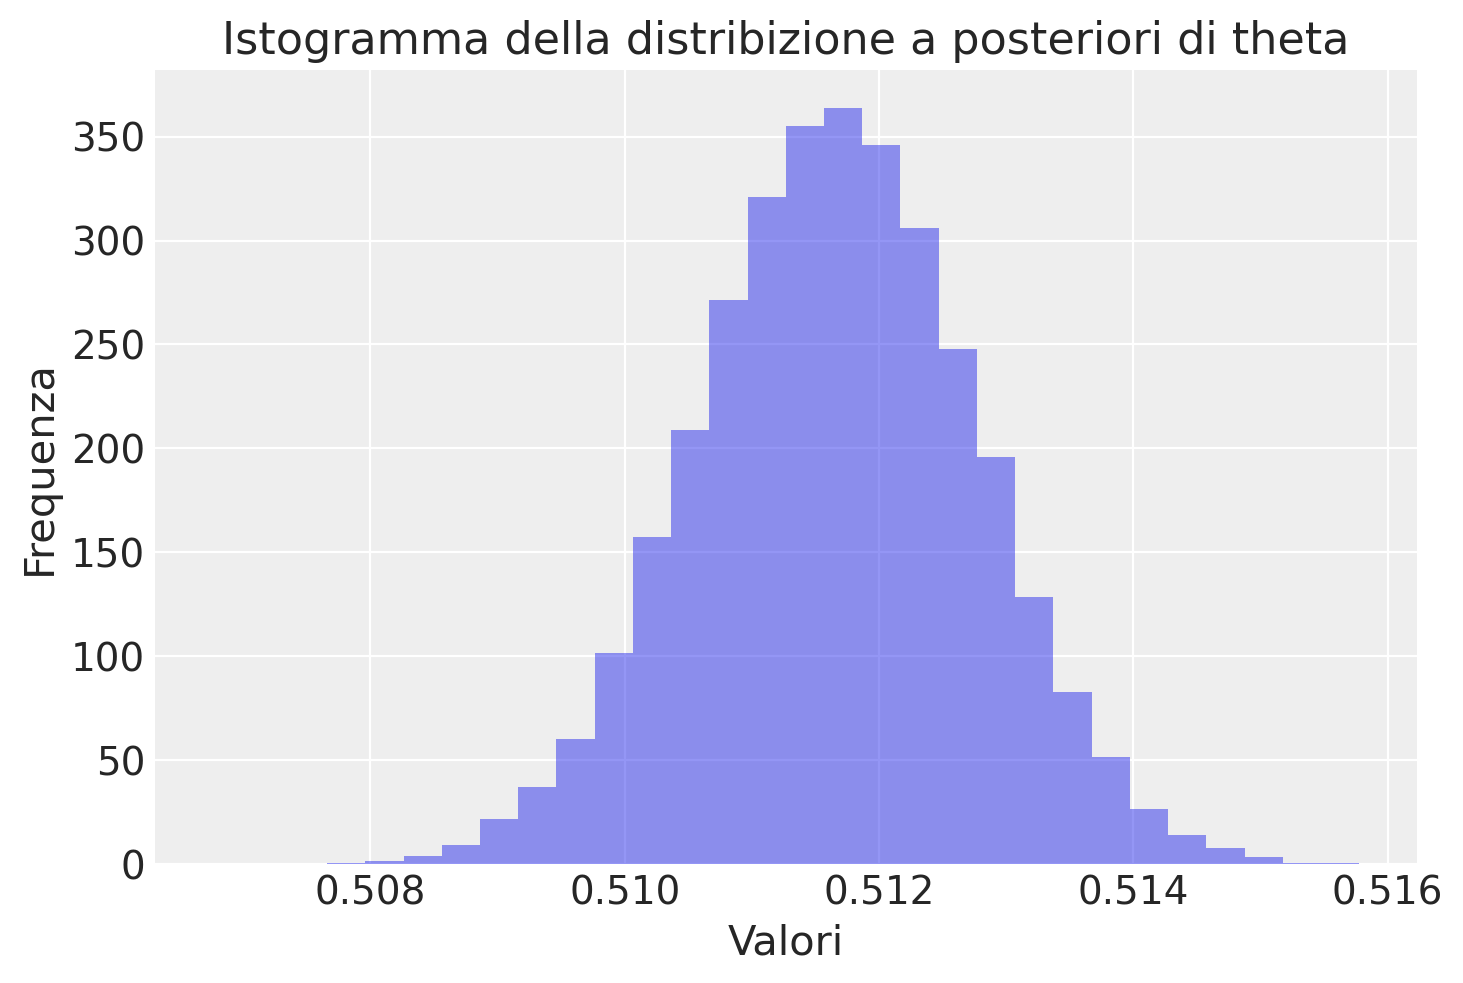

In [7]:
plt.hist(
    theta_draws,
    bins=30,
    alpha=0.5,
    density=True,
)
plt.title("Istogramma della distribizione a posteriori di theta")
plt.xlabel("Valori")
plt.ylabel("Frequenza")
plt.show()

Per il modello di Laplace, la stima per il tasso di nascite maschili $\theta$ condizionata sui dati di nascita $y$ è calcolata come la media campionaria delle estrazioni per `theta`.

In [8]:
theta_hat = np.mean(theta_draws)
print(f"estimated theta = {theta_hat:.3f}")

estimated theta = 0.512


In [9]:
quantile_05 = np.quantile(theta_draws, 0.05)
quantile_95 = np.quantile(theta_draws, 0.95)
print(
    f"""0.05 quantile = {quantile_05:.3f};
0.95 quantile = {quantile_95:.3f}"""
)

0.05 quantile = 0.510;
0.95 quantile = 0.513


In [10]:
Pr_boy_gt_girl = np.mean(boys_gt_girls_draws)
print(f"estimated Pr[boy more likely] = {Pr_boy_gt_girl:.15f}")

estimated Pr[boy more likely] = 1.000000000000000


Come possiamo vedere di seguito, tutti i nostri campioni per $\theta$ sono maggiori di $\frac{1}{2}$, ovvero `boys_gt_girls_draws` è sempre uguale a 1:

In [11]:
np.unique(boys_gt_girls_draws)

array([1.])

Il valore 1 restituito come stima solleva l'importante problema della precisione numerica. Laplace calcolò il risultato analiticamente, che è

$$
\Pr\!\left[\Theta > \frac{1}{2} \ \bigg| \ N, y\right] \approx 1 - 10^{-27}.
$$

Quindi avremmo bisogno di un numero astronomico di campioni a posteriori prima di generare un valore di $\theta$ inferiore a $\frac{1}{2}$. La risposta di 1.0 trovata da Stan è molto vicina alla risposta vera e ben entro l'errore Monte Carlo atteso. 

In [12]:
sample.summary(sig_figs=3)

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
lp__,-149000.000,0.004770,6.720000e-01,-149000.00,-149000.000,-149000.000,19800.0,39900.0,1.0
theta,0.512,0.000009,1.090000e-03,0.51,0.512,0.513,13700.0,27600.0,1.0
boys_gt_girls,1.000,NaN,9.380000e-14,1.00,1.000,1.000,NaN,NaN,NaN


# @sec-post-pred-distr-discrete  {.unnumbered}

@exr-bag-of-coins-1

Per risolvere questo problema, calcoleremo la distribuzione predittiva a posteriori per il prossimo lancio utilizzando un nuovo set di dati: tre "testa" seguite da una "croce". Procederemo passo dopo passo:

**Passo 1: Definire il Problema e i Dati**

Abbiamo tre tipi di monete nel sacchetto:

1. **Moneta di Tipo 0**: Dà sempre "croce" (probabilità di "testa" = 0).
2. **Moneta di Tipo 1**: È una moneta equa (probabilità di "testa" = 0.5).
3. **Moneta di Tipo 2**: Dà sempre "testa" (probabilità di "testa" = 1).

Supponiamo di avere un nuovo set di dati composto da tre "testa" seguite da una "croce". Indichiamo questo set di dati come $D' = (\text{"testa"}, \text{"testa"}, \text{"testa"}, \text{"croce"})$.

**Passo 2: Calcolare le Probabilità a Posteriori**

Prima di calcolare la distribuzione predittiva a posteriori, dobbiamo aggiornare le probabilità a posteriori per ciascun tipo di moneta utilizzando il nuovo set di dati $D'$.

Prima di osservare i dati, le probabilità iniziali (priori) per ciascun tipo di moneta sono uguali:

$$
P(X = 0) = \frac{1}{3}, \quad P(X = 1) = \frac{1}{3}, \quad P(X = 2) = \frac{1}{3}.
$$

Ora calcoliamo la verosimiglianza di ottenere il set di dati $D'$ per ciascun tipo di moneta:

- **Moneta di Tipo 0 (X = 0)**:  
  Probabilità di ottenere "testa" = 0, quindi ottenere tre "testa" seguite da una "croce" è impossibile:

  $$
  P(D' | X = 0) = 0.
  $$

- **Moneta di Tipo 1 (X = 1)**:  
  Probabilità di ottenere "testa" o "croce" = 0.5. La probabilità di ottenere tre "testa" seguite da una "croce" è:  

  $$
  P(D' | X = 1) = 0.5^3 \times 0.5 = 0.5^4 = 0.0625.
  $$

- **Moneta di Tipo 2 (X = 2)**:  
  Probabilità di ottenere "testa" = 1, quindi ottenere tre "testa" seguite da una "croce" è impossibile:

  $$
  P(D' | X = 2) = 0.
  $$

Le probabilità a posteriori sono calcolate usando la formula di Bayes:

$$
P(X = i | D') = \frac{P(D' | X = i) \times P(X = i)}{P(D')},
$$

dove $P(D')$ è la probabilità totale di osservare il set di dati $D'$, calcolata come:

$$
P(D') = P(D' | X = 0) \times P(X = 0) + P(D' | X = 1) \times P(X = 1) + P(D' | X = 2) \times P(X = 2).
$$

Sostituendo i valori:

$$
P(D') = 0 \times \frac{1}{3} + 0.0625 \times \frac{1}{3} + 0 \times \frac{1}{3} = \frac{0.0625}{3} = 0.020833.
$$

Ora possiamo calcolare le probabilità a posteriori:

- **Per la Moneta di Tipo 0 (X = 0)**:
  $$
  P(X = 0 | D') = \frac{0 \times \frac{1}{3}}{0.020833} = 0.
  $$

- **Per la Moneta di Tipo 1 (X = 1)**:
  $$
  P(X = 1 | D') = \frac{0.0625 \times \frac{1}{3}}{0.020833} = \frac{0.020833}{0.020833} = 1.
  $$

- **Per la Moneta di Tipo 2 (X = 2)**:
  $$
  P(X = 2 | D') = \frac{0 \times \frac{1}{3}}{0.020833} = 0.
  $$

**Passo 3: Calcolare la Distribuzione Predittiva a Posteriori**

La distribuzione predittiva a posteriori per il prossimo lancio è data dalla combinazione delle probabilità a posteriori con le probabilità di ottenere "croce" con ciascun tipo di moneta:

$$
P(\text{croce nel prossimo lancio} | D') = P(X = 0 | D') \times 0 + P(X = 1 | D') \times 0.5 + P(X = 2 | D') \times 0.
$$

Sostituendo i valori calcolati:

$$
P(\text{croce nel prossimo lancio} | D') = 0 \times 0 + 1 \times 0.5 + 0 \times 0 = 0.5.
$$

La distribuzione predittiva a posteriori per il prossimo lancio, dato che abbiamo osservato tre "testa" seguite da una "croce", è 0.5. 


@exr-bag-of-coins-2

Passo 1: Prior.

Le probabilità preliminari sono:

$$
P(X = 0) = 0.5, \quad P(X = 1) = 0.25, \quad P(X = 2) = 0.25.
$$

Passo 2: Verosimiglianza.

- Moneta di Tipo 0 (X = 0): $P(D | X = 0) = 0.$
- Moneta di Tipo 1 (X = 1):  $P(D | X = 1) = 0.3 \times 0.7 \times 0.3 = 0.063.$
- Moneta di Tipo 2 (X = 2):  $P(D | X = 2) = 0.$

Passo 3: Calcolo delle Probabilità a Posteriori.

$$
P(D) = 0 \times 0.5 + 0.063 \times 0.25 + 0 \times 0.25 = 0.01575.
$$

$$
P(X = 0 | D) = 0, \quad P(X = 1 | D) = 1, \quad P(X = 2 | D) = 0.
$$

Passo 4: Distribuzione Predittiva a Posteriori.

$$
\begin{align}
P(\text{croce nel quarto lancio} | D) &= P(X = 0 | D) \times 1 + P(X = 1 | D) \times 0.3 + P(X = 2 | D) \times 0\notag\\ 
&= 0 \times 1 + 1 \times 0.3 + 0 \times 0\notag\\ 
&= 0.3.\notag
\end{align}
$$

In conclusione, la probabilità di ottenere "croce" al quarto lancio, dopo aver osservato la sequenza *croce, testa, croce*, è 0.3.


